# Proyecto Crankshaft Vehicles
---
**Fecha de Creación**: Noviembre 2022

- **Data Analyst**: Julio C. Martínez
- **Team Leaders**: José Manuel Barrera & Alfonso Tobar
- **Code Reviwer**: Francisco Benavides
- **Senior Data Scientist**: Francisco Alfaro

# Licencia
---
Copyright 2023 - Julio Cesar Martínez I.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# Tabla de Contenido
---

1. Introducción
2. Problema
3. Flujo de Trabajo de Solución
4. Preprocesamiento de Datos
5. Análisis Exploratorio
6. Conclusiones

# Librerías Requeridas
---

- Pandas
- Matplotlib

# Introducción
---
La historia del automóvil comienza en Gran Bretaña y Estados Unidos a finales del siglo XVIII. La concepción actual del automovilismo como industria viene hasta a finales del siglo XIX, primordialmente por Karl Benz ya que para 1889 ya había capitalizado y vendido varios automóviles al público.

A partir de los cincuenta, las marcas comenzaron a tomar en cuenta más segmentos, Volkswagen comenzaba un complicado proceso de importación hacia los Estados Unidos con el Beetle. Posteriormente, otras opciones como Toyota, Nissan se añadirían a su expansión internacional.

Los años 70 fueron cruciales, ya que la tecnología se iba aplicando no sólo en la propulsión, sino en sistemas de seguridad. Ya en los noventa es cuando la industria se consolida con más innovaciones y avances en confort y emisiones.

Actualmente, nos encontramos en una era moderna de la industria automotriz, con un enfoque tecnológico pensado en el futuro. Las nuevas propulsiones eléctricas, así como sistemas de seguridad y más potencia han sido un eje principal. Sin duda alguna, este sector ha sido un reflejo de las etapas históricas de la humanidad.

# Problema
---

**¿Qué vende un coche?**

Somos **data analyst** en **Crankshaft List**. Cientos de anuncios gratuitos de vehículos se publican en el sitio web de la empresa, cada día. Necesitamos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# Flujo de Trabajo de Solución
---

**Objetivo**

El propósito de este proyecto será realizar un análisis exploratorio de datos para determinar qué o cuáles son los factores que influyen en el precio de un vehículo utilizando para ello los diversos parámetros que se encuentran dentro de nuestro data set.

Tendremos que realizar los siguientes pasos:

- Preprocesamiento
- Limpieza
- Añadir datos

Una vez terminado el preprocesamiento, deberemos realizar el respectivo análisis a profundidad.

## Inicialización

---

Cargamos las librerías correspondientes para esta investigación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame y configuración de notebook
data = pd.read_csv('/content/vehicles_us.csv', sep=',')
pd.options.display.max_rows = 200

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price` - precio del auto.
- `model_year` - año del modelo del auto.
- `model` - modelo del auto.
- `condition` - condición/estado del auto.
- `cylinders` - cilindros del auto.
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado.
- `transmission` - tipo de transmisión del auto (automática/manual).
- `paint_color` - color de pintura del auto.
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado.
- `days_listed` — desde la publicación hasta que se elimina.

In [3]:
# imprimiendo la información general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
41378,3500,2008.0,honda civic,like new,4.0,gas,142300.0,automatic,sedan,blue,NaN,2018-08-29,50


**Observaciones**

Nuestras primeras impresiones del dataframe indican valores ausentes en algunas columnas, también detectamos problemas de datos inapropiados y algunos duplicados.

**Datos Inapropiados**

*   La columna is_4wd tiene valores ausentes y flotantes.
*   La columna date_posted está en formato object pero debería estar en formato de fecha.
*   La columna 'days_listed' se encuentra en formato float pero sus valores son de tipo entero.
*   La columna 'model_year' tiene valores de coma flotante pero deberían ser enteros.
*   La columna 'model' tiene valores duplicados.

**Valores Ausentes**

Tenemos valores ausentes en al menos 5 columnas de nuestro dataframe:

* model_year
* cylinders
* odometer
* paint_color
* is_4wd

Las dos columnas con más valores ausentes son:

* is_4wd
* paint_color

### Conclusiones y Siguientes Pasos

Detectamos varios problemas que vamos a corregir, en el caso de los **datos inapropiados**, vamos a corregir su tipo erroneo por el que deberían ser.

En el caso de los **valores ausentes** vamos analizar a fondo las columnas para averiguar de qué manera podemos abordarlos ya sea eliminandolos o imputarlos y de paso buscaremos valores duplicados que puedan afectar nuestro análisis.

## Tratar los valores ausentes (si hay)
----

In [5]:
# Revisamos si hay valores ausentes
data[data.isna().any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [6]:
# Total de valores ausentes
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Ahora que tenemos un diagnóstico sobre los valores ausentes, vamos a trabajar con las columnas en este orden de aparición.

**Columna: Model_Year**

In [7]:
# Conteo de ausentes
data['model_year'].isna().sum()

3619

In [8]:
data['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [9]:
print('La tasa de distribución de valores ausentes en model_year es:',
      round((data['model_year'].isna().sum() / len(data))*100,2),'%')

La tasa de distribución de valores ausentes en model_year es: 7.02 %


Se trata de un valor muy bajo dentro de nuestro set de datos por lo que podemos imputar estos valores ausentes, para hacerlo debemos tomar en cuenta que tenemos una variable númerica discreta, es decir, solo tiene valores enteros.

In [10]:
# Comparación con otra columna con la que podría tener relación
data[(data['model_year'].isna()) & (data['condition'])]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [11]:
# Promedio de autos por condición y año del modelo
data.groupby('condition')['model_year'].median()

condition
excellent    2012.0
fair         2003.0
good         2009.0
like new     2014.0
new          2018.0
salvage      2005.0
Name: model_year, dtype: float64

In [12]:
# Vamos a imputar los valores ausentes con base en la mediana que existe entre las condiciones de los autos
def replace_model_year(data):
    model_ref = data.groupby('condition')['model_year'].median()

    data.loc[(data['condition'] == 'excellent') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['excellent']
    data.loc[(data['condition'] == 'fair') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['fair']
    data.loc[(data['condition'] == 'good') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['good']
    data.loc[(data['condition'] == 'like new') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['like new']
    data.loc[(data['condition'] == 'new') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['new']
    data.loc[(data['condition'] == 'salvage') & (data['model_year'].isna()), 'model_year'] = model_ref.loc['salvage']

    return data

replace_model_year(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [13]:
data = replace_model_year(data)
data['model_year'].isna().sum()

0

**Columna: Cylinders**

In [14]:
print('Total de Valores Ausentes:', data['cylinders'].isna().sum())
print('La tasa del porcentaje de distribución para cylinders es:',
    round((data['cylinders'].isna().sum()/len(data))*100,2),'%')

Total de Valores Ausentes: 5260
La tasa del porcentaje de distribución para cylinders es: 10.21 %


In [15]:
# Revisamos la columna con la que podría tener relación el cilindraje de un auto
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [16]:
# Agrupamos y sacamos la mediana por tipo de auto respecto a su cilindraje
data.groupby('type')['cylinders'].median()

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64

In [17]:
# Creamos una función para rellenar los valores ausentes en cylinders

def replace_cylinders(data):
    model_ref = data.groupby('type')['cylinders'].median()

    data.loc[(data['type'] == 'SUV') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['SUV']
    data.loc[(data['type'] == 'bus') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['bus']
    data.loc[(data['type'] == 'convertible') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['convertible']
    data.loc[(data['type'] == 'coupe') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['coupe']
    data.loc[(data['type'] == 'hatchback') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['hatchback']
    data.loc[(data['type'] == 'mini-van') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['mini-van']
    data.loc[(data['type'] == 'offroad') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['offroad']
    data.loc[(data['type'] == 'other') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['other']
    data.loc[(data['type'] == 'pickup') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['pickup']
    data.loc[(data['type'] == 'sedan') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['sedan']
    data.loc[(data['type'] == 'truck') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['truck']
    data.loc[(data['type'] == 'van') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['van']
    data.loc[(data['type'] == 'wagon') & (data['cylinders'].isna()), 'cylinders'] = model_ref.loc['wagon']

    return data
replace_cylinders(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [18]:
# Sustitución
data = replace_cylinders(data)
data['cylinders'].isna().sum()

0

**Columna: Odometer**

In [19]:
print('Total de Valores Ausentes:', data['odometer'].isna().sum())
print('Distribución de Ausentes:', round((data['odometer'].isna().sum() / len(data))*100,1),'%')

Total de Valores Ausentes: 7892
Distribución de Ausentes: 15.3 %


Nuestros valores ausentes abarcan el 15% del total de nuestros datos, vamos a ver la diferencia entre rellenar y no hacerlo.

In [20]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.816419,6.130810,115553.461738,1.0,39.55476
std,10040.803015,6.091605,1.658414,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2007.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [21]:
data.dropna().describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,17791.000000,17791.000000,17791.000000,17791.000000,17791.0,17791.000000
mean,15337.186443,2010.076499,6.819234,118206.496206,1.0,39.736327
std,11328.488694,5.600524,1.450256,65690.727129,0.0,28.014425
min,1.000000,1965.000000,3.000000,0.000000,1.0,0.000000
25%,6900.000000,2007.000000,6.000000,72259.500000,1.0,19.000000
50%,13300.000000,2011.000000,8.000000,116002.000000,1.0,34.000000
75%,21900.000000,2014.000000,8.000000,158990.000000,1.0,54.000000
max,375000.000000,2019.000000,12.000000,980000.000000,1.0,263.000000


Podemos comprobar que no existe un impacto significativo en los datos si los rellenamos, además hay algunos valores atípicos, por lo que vamos a rellenar nuestros valores con el valor de la mediana, pues esta es más robusta a los valores atípicos.

In [22]:
# Redondear
data['model_year'] = round(data['model_year'])

# Agrupar y crear set
odometer_avg = data.groupby('model_year')['odometer'].median()
odometer_avg = odometer_avg.to_frame().rename(columns={'odometer':'odometer_median'}).reset_index()
odometer_avg

,model_year,odometer_median
0,1908.0,169328.0
1,1929.0,NaN
2,1936.0,30000.0
3,1948.0,4000.0
4,1949.0,1800.0
5,1954.0,3565.0
6,1955.0,47180.0
7,1958.0,32991.5
8,1960.0,16000.0
9,1961.0,66000.0


In [23]:
# Añadimos nueva columna
data = data.merge(odometer_avg, how='left', on='model_year')
# Realizamos imputación de valores
data.loc[pd.isna(data['odometer']), 'odometer'] = data.loc[pd.isna(data['odometer']), 'odometer_median']
# Eliminamos la columnas sobrantes
data.drop('odometer_median', axis=1, inplace=True)

Después de este procedimiento vemos que nos queda un valor ausente que estaba en nuestro grupo de datos en el índice 1, probablemente su valor se haya borrado con el paso de los años. Sea cual sea el caso vamos a rellenarlo con el valor de su índice vecino (2). Después de todo solo es 1 dato.

In [24]:
# Imputación
data['odometer'] = data['odometer'].fillna(30000)
print('Cantidad de Nulos en Odometer:', data['odometer'].isna().sum())

Cantidad de Nulos en Odometer: 0


**Columna: Paint Color**

La columna contiene valores categoricos, no tienen correlación con alguna de las otras columnas de nuestro set de datos. Quizás estos vehículos estaban desgastados y la pintura se decoloró, no podemos determinar una causa que lo justifique. Por lo tanto, vamos a rellenarla con el valor de 'otro'

In [25]:
# Conteo de valores ausentes
data['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [26]:
# Imputación
data['paint_color'].fillna(value='otro', inplace=True)
# Conteo de nulos
data['paint_color'].isna().sum()

0

**Columna: Is_4wd**

En esta columna se intentaron utilizar valores de tipo booleano pero en lugar de usar true o false colocaron 1.0 y NaN, vamos a corregir solo los valores NaN por el momento.

In [27]:
# Revisión de ausentes
print('Valores nulos en Is_4wd:', data['is_4wd'].isna().sum())
# Corregimos valores NaN
data['is_4wd'] = data['is_4wd'].fillna(0)
print('Corrección de nulos en Is_4wd:', data['is_4wd'].isna().sum())

Valores nulos en Is_4wd: 25953
Corrección de nulos en Is_4wd: 0


## Corregir los tipos de datos

---

Vamos a corregir el tipo de dato donde detectamos errores dentro de nuestro dataset.

In [28]:
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['is_4wd'] = data['is_4wd'].astype(bool)
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')
data['odometer'] = round(data['odometer'])
data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Habíamos detectado valores con faltas de orografía en la columna **model**, es bueno momento para corregir esto, vamos a imprimir una lista de los valores que contiene para detectar aquellos que son erroneos.

In [29]:
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

Hay valores mal escritos en los modelos de ford, vamos a corregirlos.

In [30]:
data['model'] = data['model'].replace(
    ['ford f150', 'ford f250', 'ford f250 super duty', 'ford f-250 sd', 'ford f350','ford f350 super duty', 'ford f-350 sd', 'ford f150 supercrew cab xlt'],
    ['ford f-150', 'ford f-250', 'ford f-250 super duty', 'ford f-250 super duty', 'ford f-350', 'ford f-350 super duty', 'ford f-350 super duty', 'ford f-150 supercrew cab xlt'])
# Enlistamos valores
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-150 supercrew cab xlt',
 'ford f-250',
 'ford f-250 super duty',
 'ford f-350',
 'ford f-350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra

## Enriquecer datos

---

Vamos agregar algunos datos adicionales para facilitar el análisis de nuestro dataset.

In [31]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['posted_by_year'] = data['date_posted'].dt.year
data['posted_by_month'] = data['date_posted'].dt.month
data['posted_by_weekday'] = data['date_posted'].dt.weekday

In [32]:
# Los años del vehículo cuando el anuncio se colocó
# Para obtener el cálculo que necesitamos, vamos restar la columna de año de posteo con la del año del vehículo
# El resultado lo agregamos a una nueva columna
data['car_years'] = data['posted_by_year'] - data['model_year']+1

In [33]:
# Millaje promedio del vehículo por año
data['avg_mileage_by_year'] = round(data['odometer'] / data['car_years'])

In [34]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data['condition'] = data['condition'].replace(['good','like new', 'fair', 'excellent', 'salvage', 'new'],['2', '4', '1', '3', '0', '5'])
# Cambiamos su tipo de dato
data['condition'].astype(float)

0        2.0
1        2.0
2        4.0
3        1.0
4        3.0
        ... 
51520    4.0
51521    0.0
51522    3.0
51523    2.0
51524    2.0
Name: condition, Length: 51525, dtype: float64

Categorización para las condiciones de los autos:

* salvage   = 0
* fair      = 1
* good      = 2
* excellent = 3
* like new  = 4
* new       = 5

## Comprobar datos limpios

---

In [35]:
# imprime la información general/resumida sobre el DataFrame
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                51525 non-null  int64         
 1   model_year           51525 non-null  int64         
 2   model                51525 non-null  object        
 3   condition            51525 non-null  object        
 4   cylinders            51525 non-null  int64         
 5   fuel                 51525 non-null  object        
 6   odometer             51525 non-null  float64       
 7   transmission         51525 non-null  object        
 8   type                 51525 non-null  object        
 9   paint_color          51525 non-null  object        
 10  is_4wd               51525 non-null  bool          
 11  date_posted          51525 non-null  datetime64[ns]
 12  days_listed          51525 non-null  int64         
 13  posted_by_year       51525 non-

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posted_by_year,posted_by_month,posted_by_weekday,car_years,avg_mileage_by_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,otro,True,2018-06-23,19,2018,6,5,8,18125.0
1,25500,2009,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,10,8870.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.0
3,1500,2003,ford f-150,1,8,gas,162611.0,automatic,pickup,otro,False,2019-03-22,9,2019,3,4,17,9565.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26968.0


## Estudiar parámetros principales

---

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

**Precio**

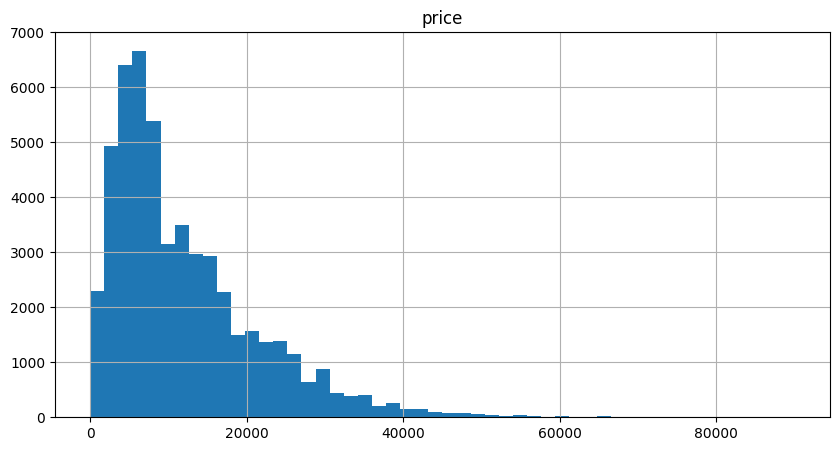

In [36]:
# Revisamos nuestra columna: price
data.hist(
    'price',bins=50,
    range=(0,90000),
    figsize=(10,5)
    )
plt.show();

Se visualizan autos con valor muy cercano a los 0 dolares, esto debe ser un error, vamos a acercar la gráfica para averiguar más sobre estos valores.

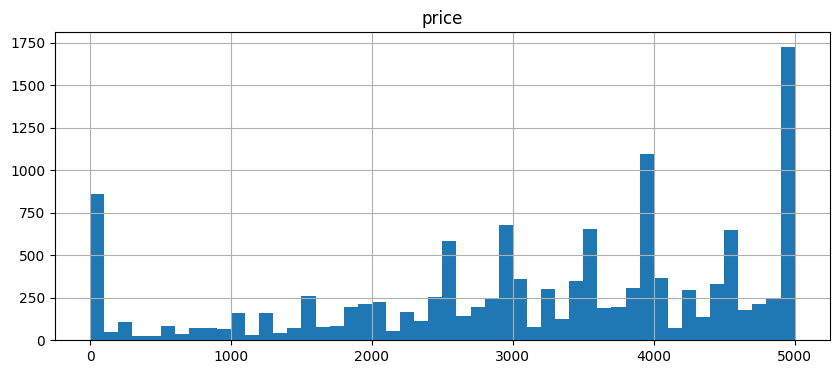

In [37]:
# Cambiamos el rango para visualizar mejor los valores cercanos a cero
data.hist(
    'price',bins=50,
    range=(0,5000),
    figsize=(10,4)
    )
plt.show();

Lo tenemos, hay bastantes autos por debajo del valor de **2000 dls** (alrededor de 40,000 pesos mexicanos), podemos afirmar que son valores atípicos pues hoy en día ese es el valor que tienen los autos más usados y antiguos, no encuentras nada por debajo de ese valor.

Ahora vamos a examinar el otro lado de la gráfica, los autos con precios más altos.

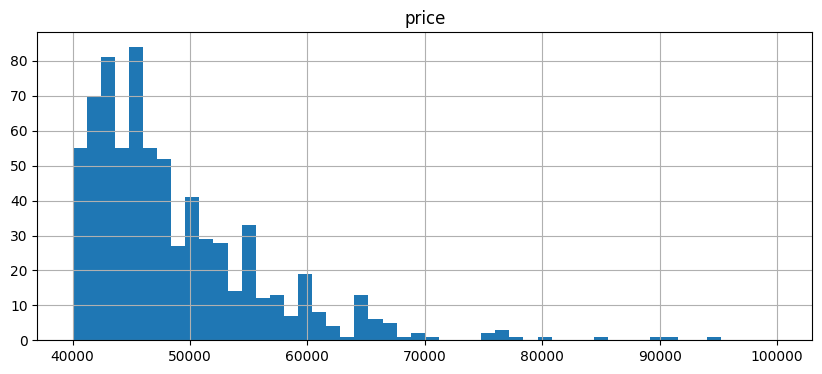

In [38]:
# Cambiamos el rango para visualizar mejor los valores cercanos al precio más alto
data.hist(
    'price',bins=50,
    range=(40000,100000),
    figsize=(10,4)
    )
plt.show();

Tenemos autos por encima de los 70 mil dls, posiblemente también sean valores atípicos, antes de tomar una decisión debemos inspecionarlos, tal vez se trate de autos exóticos de lujo.

In [39]:
# Filtramos valores
data[data['price'] > 75000].sort_values(by='price')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posted_by_year,posted_by_month,posted_by_weekday,car_years,avg_mileage_by_year
2790,76000,2016,chevrolet corvette,5,8,gas,1700.0,automatic,convertible,white,False,2018-07-15,79,2018,7,6,3,567.0
23774,76500,2015,chevrolet silverado 2500hd,4,8,diesel,8989.0,automatic,pickup,white,True,2019-02-23,31,2019,2,5,5,1798.0
50664,76995,2018,cadillac escalade,3,8,gas,4500.0,other,SUV,white,True,2018-10-25,21,2018,10,3,1,4500.0
12485,78000,2009,honda odyssey,2,6,gas,126567.0,automatic,van,blue,False,2018-11-14,28,2018,11,2,10,12657.0
1326,79900,2014,ford f-350,4,8,diesel,10060.0,automatic,pickup,white,True,2018-07-16,22,2018,7,0,5,2012.0
7113,84900,2019,ford f-350,5,8,diesel,9000.0,automatic,pickup,white,True,2019-03-26,7,2019,3,1,1,9000.0
37904,90000,2018,ford f-350 super duty,3,8,diesel,7536.0,automatic,truck,white,True,2018-08-15,55,2018,8,2,1,7536.0
4113,90577,2018,ford f-150,3,6,gas,6448.0,automatic,truck,black,True,2018-07-29,19,2018,7,6,1,6448.0
31626,94955,2014,toyota sienna,4,6,gas,145279.0,automatic,mini-van,silver,False,2019-04-03,34,2019,4,2,6,24213.0
20700,109999,2018,chevrolet corvette,5,8,gas,35.0,automatic,coupe,white,False,2018-09-07,74,2018,9,4,1,35.0


Solo 1 auto podría estar justificado como el caso del Corvette, pero los demás no justifican ese alto precio que manejan, así que estámos bastante seguros de que estos son valores atípicos.

**Años del Vehículo Cuando el Anuncio se Colocó**

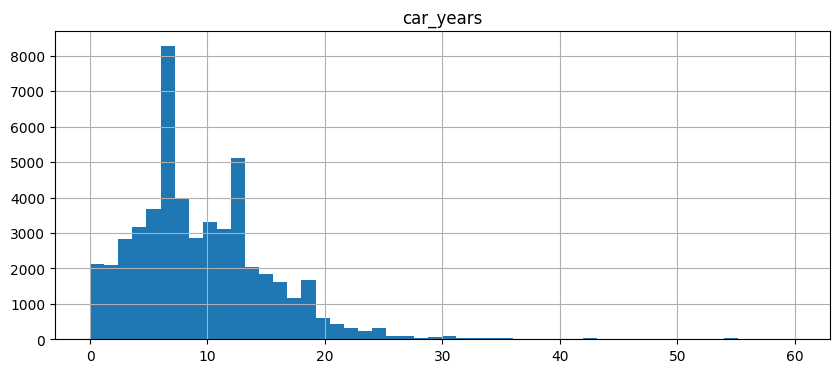

In [40]:
# Revisamos nuestra columna: car_years
data.hist(
    'car_years',bins=50,
    range=(0,60),
    figsize=(10,4)
    )
plt.show();

Tenemos autos de más de 40 años en nuestro inventario, cosa muy rara, ormalmente cuando una persona compra un auto no lo adquiere con tantos años de antiguedad a menos que sea un clásico, vamos averiguar esta parte de la gráfica, vamos a conocer si verdaderamente son autos clásicos lo que estamos buscando.

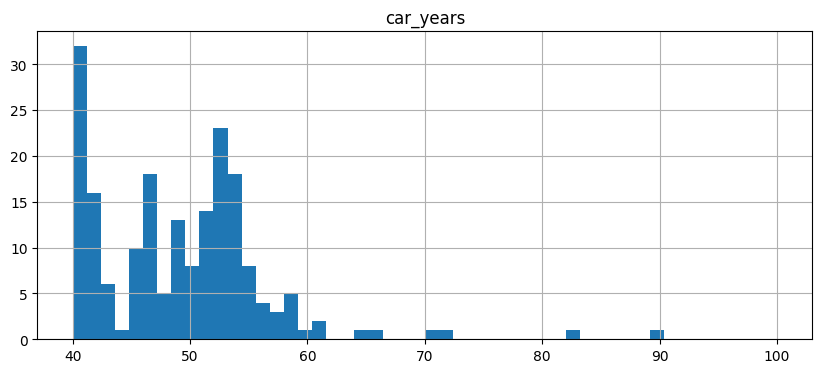

In [41]:
# Visualizamos los autos que tienen más de 40 años
data.hist(
    'car_years',
    bins=50,
    range=(40,100),
    figsize=(10,4)
    )
plt.show();

Encontramos ya algunos valores alejados de nuestros datos, y que de hecho, aparecen después de los 60 años, vamos a ver nuestro set de datos para analizar de qué se trata.

In [42]:
# Revisamos set de datos
data[data['car_years'] > 60].sort_values(by='car_years')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posted_by_year,posted_by_month,posted_by_weekday,car_years,avg_mileage_by_year
39580,35000,1958,chevrolet impala,3,8,gas,3184.0,automatic,coupe,black,False,2018-05-19,33,2018,5,5,61,52.0
48414,37900,1958,chevrolet impala,2,8,gas,62799.0,automatic,coupe,otro,False,2018-08-11,10,2018,8,5,61,1029.0
10018,23900,1955,ford f-250,3,6,gas,47180.0,manual,truck,blue,False,2018-12-22,61,2018,12,5,64,737.0
14752,15000,1954,ford f-150,3,8,gas,3565.0,manual,pickup,black,False,2019-02-16,13,2019,2,5,66,54.0
36582,44900,1949,chevrolet suburban,2,4,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10,2018,8,6,70,26.0
22595,21000,1948,chevrolet impala,4,8,gas,4000.0,automatic,sedan,red,False,2019-01-18,24,2019,1,4,72,56.0
34713,5000,1936,ford f-150,3,6,gas,30000.0,manual,pickup,purple,False,2018-11-22,10,2018,11,3,83,361.0
45694,18000,1929,ford f-150,2,8,gas,30000.0,manual,other,silver,False,2018-11-18,59,2018,11,6,90,333.0
33906,12995,1908,gmc yukon,2,8,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,2018,7,4,111,1525.0
33907,12995,1908,cadillac escalade,3,8,gas,169328.0,automatic,SUV,white,False,2018-06-24,25,2018,6,6,111,1525.0


Ahora podemos ver que hay autos con demasiados años y además no son clásicos, probablemente ni siquiera existian estos modelos en esos años por lo que hemos encontrado valores atípicos.

**Millaje**

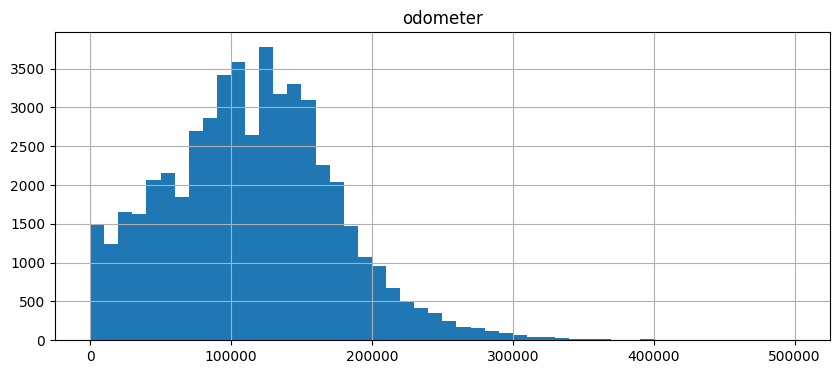

In [43]:
# Revisamos columna: odometer
data.hist(
    'odometer',
    bins=50,
    range=(0,500000),
    figsize=(10,4),
    )
plt.show();

Hay autos por encima de los 40,000 millas (unos 64 mil km), un valor razonable para la venta de un auto usado, los valores en cero pueden deberse a autos nuevos, así que no parece haber valores atípicos.

**Número de Cilindros**

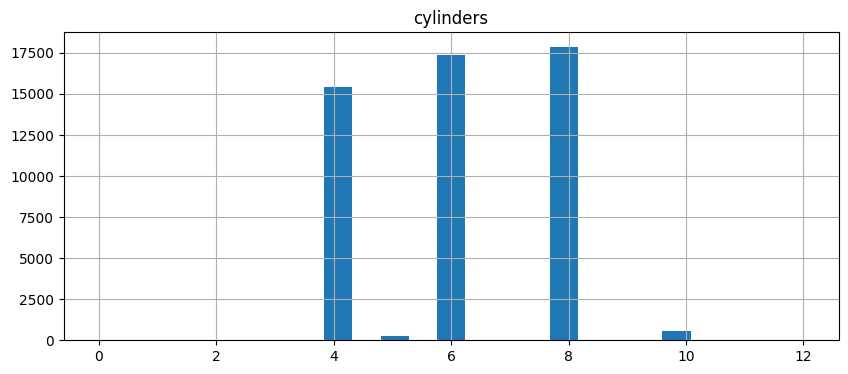

In [44]:
# Revisamos columna: cylinders

data.hist(
    'cylinders',
    bins=25,
    range=(0,12),
    figsize=(10,4)
    )
plt.show();

Todo luce bastante normal, autos de 3, 5 y hasta 12 cilíndros son completamente normales, estos últimos en autos deportivos exóticos.

**Estado / Condición**

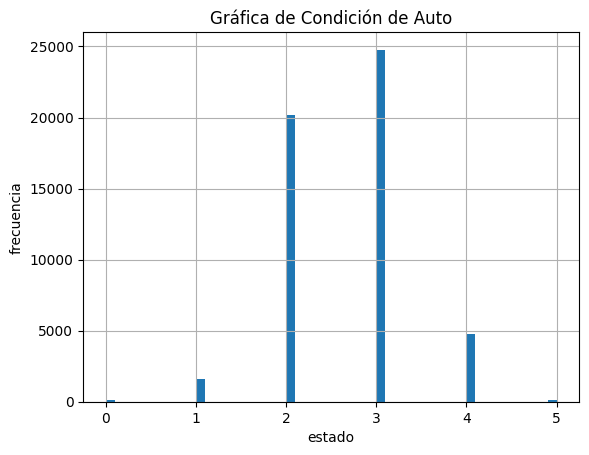

In [45]:
# Revisamos columna: condition
plt.hist(x=data['condition'].sort_values(ascending=True), bins=50)
plt.title('Gráfica de Condición de Auto')
plt.xlabel('estado')
plt.ylabel('frecuencia')
plt.grid()
plt.show();

Es bueno saber que la mayoría de nuestros autos se encuentran en excelente y buen estado respectivamente.

## Estudiar y tratar valores atípicos

Ahora vamos a determinar nuestros valores atípicos superiores e inferiores para así poder utilizar los que mejor se adapten a nuestras columnas de datos. Identificamos 3 columnas con valores atípicos que son:

* Price
* Car Years
* Odometer

Vamos a examinar el **rango intercuartíl** para determinar los valores atípicos con exactitud.

In [46]:
# Datos Price
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
Q1_price_inf = Q1_price-1.5*IQR_price

# Datos car_years
Q1_cars = data['car_years'].quantile(0.25)
Q3_cars = data['car_years'].quantile(0.75)
IQR_cars = Q3_cars - Q1_cars
Q1_cars_inf = Q1_cars-1.5*IQR_cars

# Datos odometer
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
Q1_odometer_inf = Q3_odometer-1.5*IQR_odometer

print('Límite inferior price:    ', Q1_price_inf)
print('Límite inferior car_years:', Q1_cars_inf)
print('Límite inferior odometer: ', Q1_odometer_inf)

Límite inferior price:     -12758.5
Límite inferior car_years: -7.0
Límite inferior odometer:  34022.0


In [47]:
# Límites superiores para valores atípicos
Q3_price_sup = Q3_price+1.5*IQR_price
Q3_cars_sup = Q3_cars+1.5*IQR_cars
Q3_odometer_sup = Q3_odometer+1.5*IQR_odometer

print('Límite superior price:    ', Q3_price_sup)
print('Límite superior car_years:', Q3_cars_sup)
print('Límite superior odometer: ', Q3_odometer_sup)

Límite superior price:     34597.5
Límite superior car_years: 25.0
Límite superior odometer:  271472.0


De los resultados anteriores, vamos a usar los límites en nuestras columnas de la siguiente manera:

In [48]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
data_filtered = data.query(' price > @Q1_price_inf and price <= @Q3_price_sup')
# Columna car_years solo valores superiores
data_filtered = data_filtered.query('car_years < @Q3_cars_sup')
# Columna odometer valores superiores
data_filtered = data_filtered.query('odometer <= @Q3_odometer_sup')
data_filtered.describe()

,price,model_year,cylinders,odometer,days_listed,posted_by_year,posted_by_month,posted_by_weekday,car_years,avg_mileage_by_year
count,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000,48415.000000
mean,11226.796076,2010.115419,6.064030,114708.062997,39.537850,2018.306310,6.634969,3.003057,9.190891,14468.946587
std,7824.599881,4.974805,1.658244,55791.983680,28.207642,0.460965,3.472409,1.996587,4.988026,7763.897699
min,1.000000,1995.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,4999.000000,2007.000000,4.000000,77000.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,10000.000000
50%,8995.000000,2011.000000,6.000000,115258.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,13286.000000
75%,15990.000000,2014.000000,8.000000,152000.000000,53.000000,2019.000000,10.000000,5.000000,12.000000,17523.500000
max,34595.000000,2019.000000,12.000000,271175.000000,271.000000,2019.000000,12.000000,6.000000,24.000000,195700.000000


## Estudiar parámetros principales sin valores atípicos

**Comparación de Gráficos en Price**

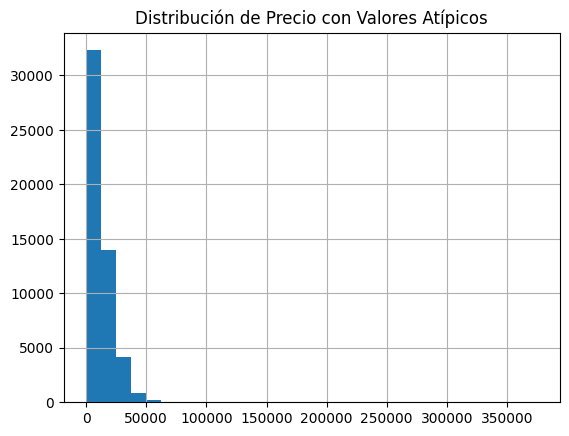

In [49]:
# Dataset original
data.hist('price',bins=30)
plt.title('Distribución de Precio con Valores Atípicos')
plt.show();

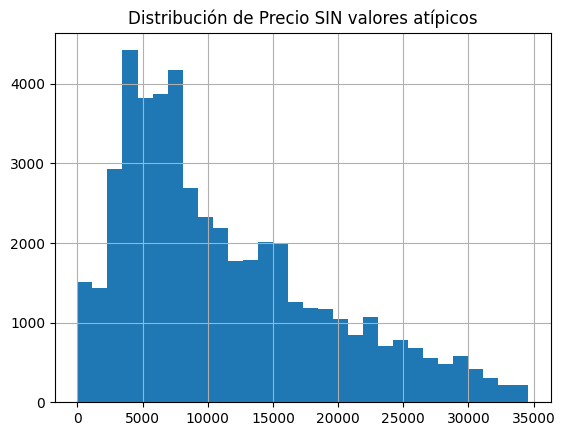

In [50]:
# Dataset filtrado
data_filtered.hist('price',bins=30)
plt.title('Distribución de Precio SIN valores atípicos')
plt.show();

Tenemos aproximadamente 3000 autos que cuestan unos 5 mil dls en nuestro pico máximo mientras que los autos más caros llegan a costar poco menos de 35 mil dls aunque son pocos de ellos quizás unos 200 autos.

**Comparación de Gráficos en car_years**

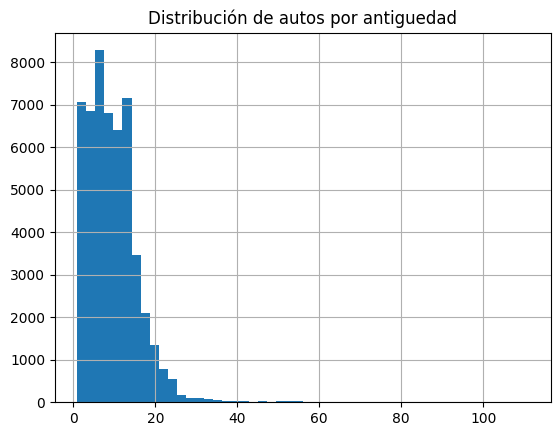

In [51]:
# Dataset original
data.hist('car_years',bins=50)
plt.title('Distribución de autos por antiguedad')
plt.show();

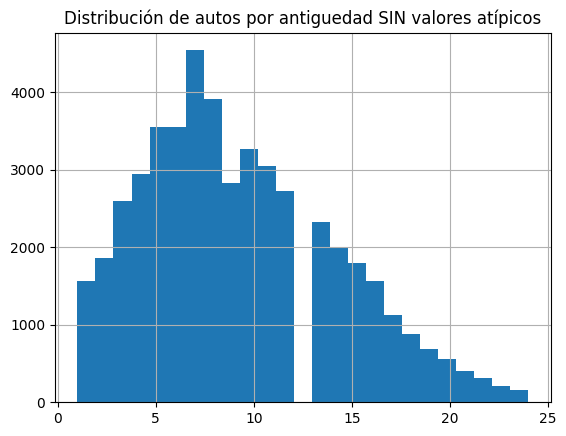

In [52]:
# Dataset filtrado
data_filtered.hist('car_years',bins=25)
plt.title('Distribución de autos por antiguedad SIN valores atípicos')
plt.show();

Gracias a nuestra segmentación podemos concluir que la mayoría de nuestros autos tienen 7 y 8 años de antiguedad. Los que se encuentran muy cerca del valor de cero son autos nuevos o seminuevos mientras que los que tienen más años han desaparecido de la gráfica original.

El hueco que se percibe en la gráfica significa que no hay autos que tengan alrededor de 12 años de antiguedad.

**Comparación de Gráficos en odometer**

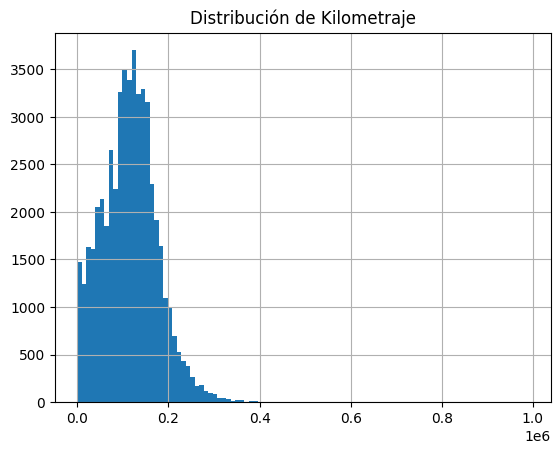

In [53]:
# Dataset original
data.hist('odometer', bins=100)
plt.title('Distribución de Kilometraje')
plt.show()

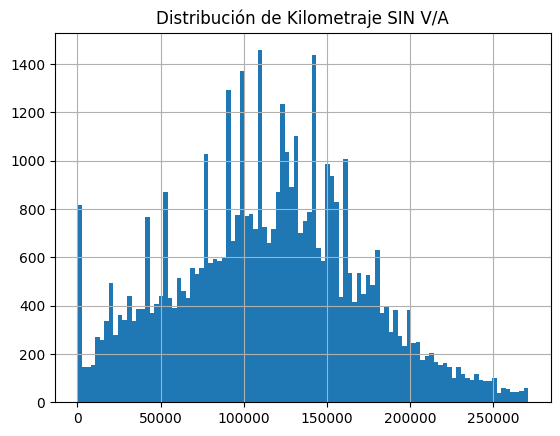

In [54]:
# Dataset filtrado
data_filtered.hist('odometer', bins=100)
plt.title('Distribución de Kilometraje SIN V/A')
plt.show();

Eliminamos los valors atípicos y podemos descubrir que hay un grupo de 2000 autos que tienen entre 100 mil y 150 mil millas en su desgaste.

## Periodo de colocación de los anuncios

---

En esta sección vamos a investigar lo siguiente:

1. Cuántos días los anuncios fueron mostrados (`days_listed`).
2. Calcular la media y la mediana.
3. Describir el periodo de colocación habitual de un anuncio.
4. Determinar cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.

In [55]:
print('La cantidad total de días que fueron mostrados los anuncios es de:', data['days_listed'].sum())

La cantidad total de días que fueron mostrados los anuncios es de: 2038059


count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
----------------------------------


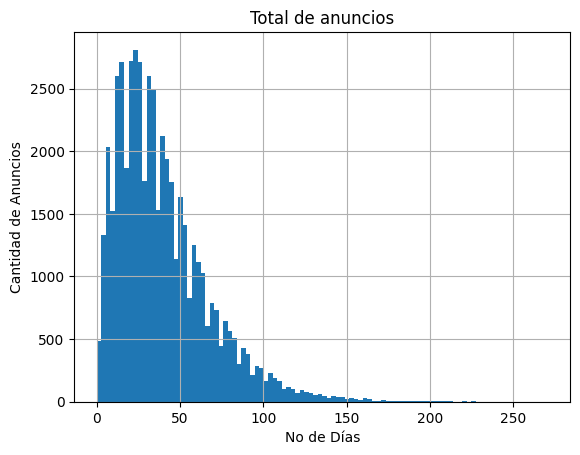

In [56]:
# Estadísticas y visualización de la información
print(data['days_listed'].describe())
print('----------------------------------')
data.hist('days_listed', bins=100)
plt.title('Total de anuncios')
plt.xlabel('No de Días')
plt.ylabel('Cantidad de Anuncios')
plt.show();

In [57]:
# Primer cuartil
Q1_days_listed = data['days_listed'].quantile(0.25)
# Tercer cuartil
Q3_days_listed = data['days_listed'].quantile(0.75)
# Rango intercuartil
IQR_days_listed = Q3_days_listed - Q1_days_listed
# Límite superior e inferior
print('Límite inferior para los días que se muestra un anucio:', Q1_days_listed-1.5*IQR_days_listed)
print('Límite superior para los días que se muestra un anucio:', Q3_days_listed+1.5*IQR_days_listed)

Límite inferior para los días que se muestra un anucio: -32.0
Límite superior para los días que se muestra un anucio: 104.0


Tras nuestro análisis observamos que:

*   El promedio de días que un anucio se muestra es de : 33
*   El valor mediano de días que un anucio se muestra es de : 40
*   Tenemos una desviación estándar de 28 días
*   El máximo número de días en que se muestra un anucio anormalmente largo es de : 271 (8 meses)
*   La cantidad mínima de días que se muestra un anucio es de : 19 días (Q1)
*   La cantidad máxima de días en que se muestra un anucio es de : 53 días (Q3)

## Precio promedio por cada tipo de vehículo
---

Analizaremos el número de anuncios y el precio promedio para cada tipo de vehículo. Trazaremos un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Seleccionaremos los dos tipos con un mayor número de anuncios.

In [58]:
# Creamos nuevo set de datos por tipo de auto y precio con la cantidad de anuncios y precio promedio
data_table = data_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
# Renombramos columnas
data_table.columns=('no de anuncios', 'precio promedio')
# Arreglamos la columna type desde el índice
data_table.reset_index(drop=False, inplace=True)
# Nuestro set de datos
data_table.sort_values(by='no de anuncios', ascending=False)

,type,no de anuncios,precio promedio
9,sedan,12027,6973.522574
0,SUV,11923,10443.872935
10,truck,11127,15130.293880
8,pickup,6304,15050.901491
3,coupe,2015,13523.516625
12,wagon,1506,8975.517928
5,mini-van,1147,8046.564080
4,hatchback,1005,6838.702488
11,van,584,8820.914384
2,convertible,341,13046.598240


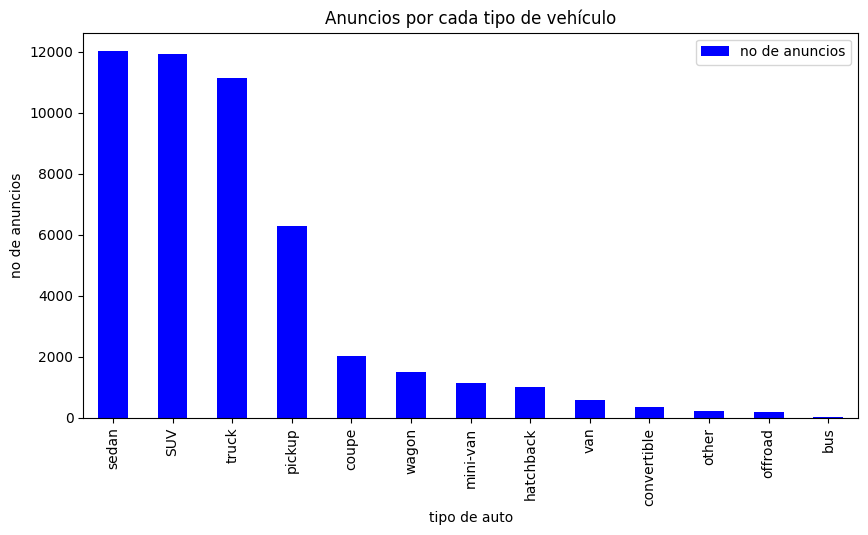

In [59]:
data_table.sort_values(
    by='no de anuncios', ascending=False).plot('type',
                                               'no de anuncios',
                                               kind='bar',
                                               figsize=(10,5),
                                               color='blue')
plt.ylabel('no de anuncios')
plt.xlabel('tipo de auto')
plt.title('Anuncios por cada tipo de vehículo')
plt.show();

Los autos sedan y SUV son los que gozan de mayor cantidad de anuncios, seguidos del tipo truck y pick up respectivamente, por el contrario, los autos que menos reciben anuncios son el tipo bus y offroad.

## Factores de precio

---

Con todo lo anterior nos preguntamos: **¿Qué factores impactan más sobre el precio?**

Para resolver esto, tomaremos cada uno de los tipos más populares que hemos detectado en la fase anterior y estudiaremos si el precio depende de la edad, millaje, condición, tipo de transmisión y color.

Para las variables categóricas (tipo de transmisión y color) trazaremos gráficos de caja y bigotes y crearemos gráficos de dispersión para el resto. Cuando analicemos variables categóricas, debemos observar que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.

Utilizaremos una matriz de correlación y diagramas de correlación

In [60]:
# Creamos un nuevo dataframe con los 4 tipos de auto más populares
data_matrix = data_filtered.query('type == "sedan" or type == "SUV" or type == "truck" or type == "pickup"')
data_matrix.drop(['model_year', 'is_4wd', 'model', 'cylinders', 'fuel', 'type', 'date_posted', 'days_listed', 'posted_by_year', 'posted_by_month', 'posted_by_weekday', 'avg_mileage_by_year'], axis=1, inplace=True)
data_matrix

<ipython-input-60-a9705c9a97cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix.drop(['model_year', 'is_4wd', 'model', 'cylinders', 'fuel', 'type', 'date_posted', 'days_listed', 'posted_by_year', 'posted_by_month', 'posted_by_weekday', 'avg_mileage_by_year'], axis=1, inplace=True)


,price,condition,odometer,transmission,paint_color,car_years
0,9400,2,145000.0,automatic,otro,8
1,25500,2,88705.0,automatic,white,10
2,5500,4,110000.0,automatic,red,7
3,1500,1,162611.0,automatic,otro,17
4,14900,3,80903.0,automatic,black,3
...,...,...,...,...,...,...
51520,9249,4,88136.0,automatic,black,6
51521,2700,0,181500.0,automatic,white,17
51522,3950,3,128000.0,automatic,blue,10
51523,7455,2,139573.0,automatic,black,6


In [61]:
data_matrix['transmission'].value_counts()

automatic    38590
manual        1693
other         1098
Name: transmission, dtype: int64

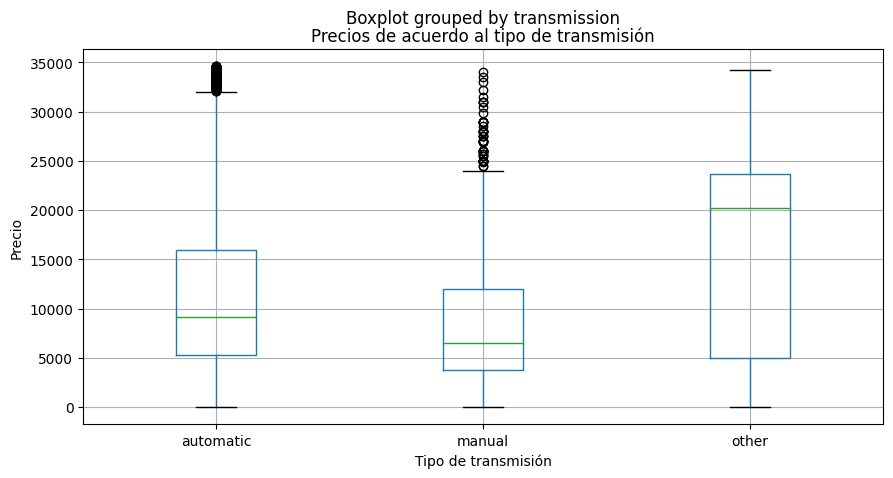

In [62]:
data_matrix.boxplot(column=['price'], by='transmission', figsize=(10,5))
plt.title('Precios de acuerdo al tipo de transmisión')
plt.ylabel('Precio')
plt.xlabel('Tipo de transmisión')
plt.show();

Hay una relación entre el precio y las transmisiones, las transmisiones automáticas son más costosas que las transmisiones manuales, esto tiene setnido, las de más coste son las de otro tipo de transmisiones.

In [63]:
data_matrix['paint_color'].value_counts()

white     8347
otro      7441
black     6110
silver    5137
grey      4119
blue      3511
red       3343
green     1062
brown      991
custom     932
orange     159
yellow     145
purple      84
Name: paint_color, dtype: int64

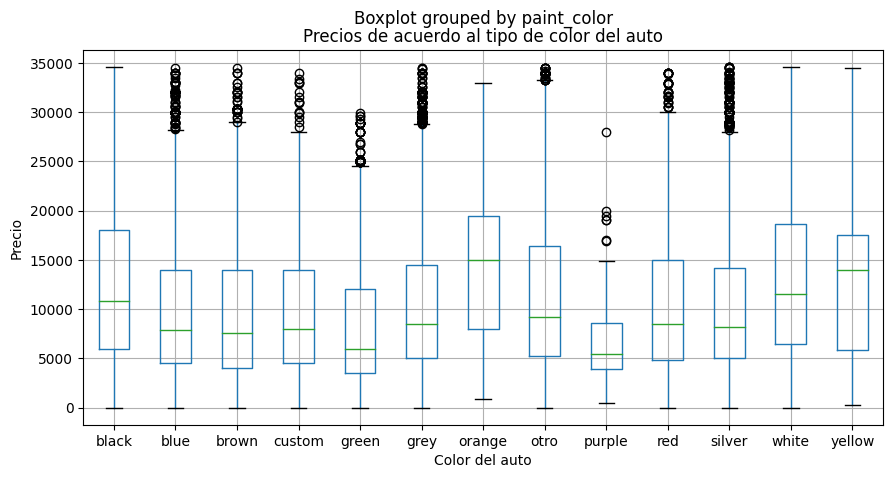

In [64]:
data_matrix.boxplot(column=['price'], by='paint_color', figsize=(10,5))
plt.title('Precios de acuerdo al tipo de color del auto')
plt.ylabel('Precio')
plt.xlabel('Color del auto')
plt.show();

El precio de un auto no tiene mucha correlación con el color de su pintura porque casi todas se mantienen dentro de la misma medida y algunos valores atípicos se encuentran en los valores de precio más altos. Los únicos autos que tienen una muy ligera tendencia son los de color naranja pero no es un aumento significativo del cual preocuparse.

**Matriz de Correlación de Pearson**

<ipython-input-65-d98b13d15812>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_matrix.corr())


             price  odometer  car_years
price      1.00000 -0.417840  -0.514520
odometer  -0.41784  1.000000   0.612884
car_years -0.51452  0.612884   1.000000
---------------------------------------


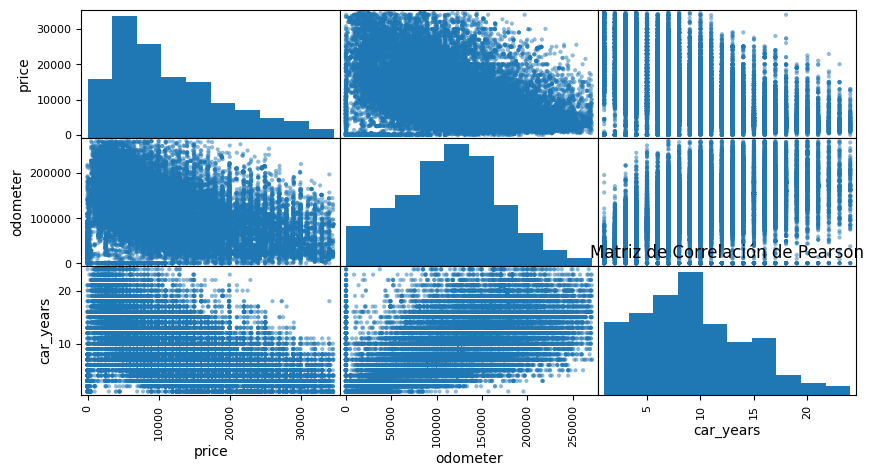

In [65]:
print(data_matrix.corr())
print('---------------------------------------')
pd.plotting.scatter_matrix(data_matrix, figsize=(10,5))
plt.title('Matriz de Correlación de Pearson')
plt.show();

Al analizar nuestra matriz nos damos cuenta de que el precio tiene una correlación con el desgaste de las millas del auto así como la edad del mismo. A mayor desgaste del auto más disminuye el precio del vehículo y mientras más años tenga el vehículo también disminuye su precio.

**Nota:** por alguna extraña razón desconocemos por qué al aplicar la matriz desaparece nuestro parámetro de 'condition' ya que este si existe en nuestro set de datos y también se tiene el valor entero del parámetro para que la matriz pueda tomarlo en cuenta.



## Conclusión general

---

Después de pasar un tiempo analizando nuestros datos llegamos a las siguientes conclusiones.

**Pre-procesamiento de datos**

*   Identificamos y estudiamos los valores ausentes dentro de nuestro set de datos.
*   En algunos casos había una forma obvia de reemplazar valores ausentes. Por ejemplo, si un campo booleano contenía solo valores True, era razonable asumir que los valores ausentes son False. Para otros tipos de datos no había arreglos tan obvios, y hubo casos en los que el hecho de que haya un valor ausente era significativo como lo era el millaje.
*   Convertimos los tipos de datos necesarios para mejorar su manipulación durante el proceso de preprocesamiento de datos.

**Enriquecer el Set de Datos**

*   Añadimos a nuestro dataframe el día, mes y año en que se colocaron los anuncios.
*   Calculamos los años del vehículo cuando se publicó su anuncio.
*   Anexamos una operación especial para integrar el millaje promedio de cada auto por año.
*   Se hizo un cambio en la columna 'condition' de valores strings a enteros sin embargo por alguna extraña razón se dificultó su uso al momento de aplicar la matriz de correlación pues nuestro parámetro desapareció sin razón aparente.

**Análisis Exploratior de Datos**

Estudiamos los siguientes parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición. Trazamos histogramas para cada uno de los parámetros. Estudiamos cómo los valores atípicos afectan a la forma y legitimidad de los histogramas.

Determinamos los límites superiores de los valores atípicos, eliminamos dichos valores y los almacenamos en un DataFrame apartado.

Utilizamos los datos filtrados para plantear nuevos histogramas y los comparamos con los histogramas anteriores (aquellos con los valores atípicos incluidos).

Se estudiaron cuántos días los anuncios fueron mostrados (days_listed) y trazamos un histograma. Calculamos la media y la mediana de ello. Describimos la vida útil habitual de un anuncio. Determinamos cuándo se eliminan rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.

Analizamos el número de anuncios y el precio medio para cada tipo de vehículo y trazamos un gráfico mostrando la dependencia de los números de anuncios en cada tipo de vehículo. Seleccionamos los dos tipos con un mayor número de anuncios.

Respondimos la problemática: ¿Qué factores impactan más sobre el precio?

Para ello tomamos cada uno de los tipos más populares de autos que detectamos en la fase anterior y estudiamos si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color), trazamos gráficos de caja y bigotes, y creamos gráficos de dispersión para el resto.

**Lo más importante** de este proyecto fue que pudimos llegar a nuestro objetivo principal para responder a la pregunta inicial ¿qué es lo que vende un coche? porque estos resultados contribuyen a la mejora continua y a una mejor toma de decisiones del negocio. **Lo que más ayudo** para resolver este análisis fue la aplicación de nuevas técnicas de programación aprendidas durante el sprint 3 como son: el uso de la función merge, los histogramas, diagramas de caja y bigotes así como matrices de dispersión, correlación de pearson, desviación estándar y otros datos estadísticos porque sin todas estas herramientas hubiera sido demasiado complejo llegar a nuestros resultados.

**Lo más difícil** de este proyecto fue aplicar las gráficas adecuadas a cada tipo de variable así como su interpretación, tuvimos que dedicar tiempo extra para entender como interpretar un histograma, usar los bins y el rango de la misma. Otro reto importante fue el de comprender con precisión el enfoque adecuado del proyecto porque tuvimos que pasar por diversos errores y re leer instrucciones para llegar a ese enfoque.